<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week02/Day5/EX5/W2D5EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge - Circle
**texte en gras**
Last Updated: April 30th, 2025

What You will learn :
OOP dunder methods


Instructions :
The goal is to create a class that represents a simple circle.
A Circle can be defined by either specifying the radius or the diameter.
The user can query the circle for either its radius or diameter.

Other abilities of a Circle instance:

- Compute the circle’s area
- Print the attributes of the circle - use a dunder method
- Be able to add two circles together, and return a new circle with the new radius - use a dunder method
- Be able to compare two circles to see which is bigger, and return a Boolean - use a dunder method
- Be able to compare two circles and see if there are equal, and return a Boolean- use a dunder method
- Be able to put them in a list and sort them*

Bonus (not mandatory) : Install the Turtle module, and draw the sorted circles


This challenge is an opportunity to practice using dunder methods (__add__, __eq__, __lt__, __str__, etc.) to make classes behave like a built-in Python type.


**Features Required in Circle Class**

Attributes
Defined by radius or diameter

Ability to get radius or diameter

Methods
area(): compute the area

__str__(): nicely print attributes

__add__(): add two circles → new circle with summed radius

__eq__(): check if two circles are equal (based on radius)

__lt__(): compare two circles (for sorting)

Bonus: Visualize sorted circles using Turtle

**Python Implementation**

In [ ]:
import math

class Circle:
    def __init__(self, *, radius=None, diameter=None):
        if radius is not None:
            self._radius = radius
        elif diameter is not None:
            self._radius = diameter / 2
        else:
            raise ValueError("You must provide either a radius or a diameter.")

    @property
    def radius(self):
        return self._radius

    @property
    def diameter(self):
        return self._radius * 2

    def area(self):
        return math.pi * self._radius ** 2

    def __str__(self):
        return f"Circle with radius {self.radius:.2f} and diameter {self.diameter:.2f}"

    def __add__(self, other):
        if not isinstance(other, Circle):
            return NotImplemented
        return Circle(radius=self.radius + other.radius)

    def __eq__(self, other):
        if not isinstance(other, Circle):
            return NotImplemented
        return self.radius == other.radius

    def __lt__(self, other):
        if not isinstance(other, Circle):
            return NotImplemented
        return self.radius < other.radius

    def __repr__(self):
        return f"Circle(radius={self.radius:.2f})"


Test the class

In [ ]:
# Create a few circles
c1 = Circle(radius=3)
c2 = Circle(diameter=10)
c3 = Circle(radius=5)

# Print info
print(c1)  # Circle with radius 3.00 and diameter 6.00
print(c2)  # Circle with radius 5.00 and diameter 10.00

# Area
print(f"Area of c1: {c1.area():.2f}")

# Add circles
c4 = c1 + c2
print(f"New Circle from c1 + c2: {c4}")

# Equality
print("c2 == c3?", c2 == c3)

# Comparison
print("c1 < c3?", c1 < c3)

# Sorting
circles = [c1, c2, c3, c4]
sorted_circles = sorted(circles)
print("Sorted circles:", sorted_circles)


Circle with radius 3.00 and diameter 6.00
Circle with radius 5.00 and diameter 10.00
Area of c1: 28.27
New Circle from c1 + c2: Circle with radius 8.00 and diameter 16.00
c2 == c3? True
c1 < c3? True
Sorted circles: [Circle(radius=3.00), Circle(radius=5.00), Circle(radius=5.00), Circle(radius=8.00)]


 Bonus: Turtle Visualization (Optional)

In [ ]:
import turtle

def draw_circle(t, radius, x, y):
    t.penup()
    t.goto(x, y - radius)
    t.pendown()
    t.circle(radius)

def draw_sorted_circles(circle_list):
    t = turtle.Turtle()
    t.speed(0)
    turtle.bgcolor("white")
    screen = turtle.Screen()
    screen.title("Sorted Circles")

    spacing = 50
    x_position = -300

    for circle in circle_list:
        draw_circle(t, circle.radius * 10, x_position, 0)  # scale radius
        x_position += circle.radius * 20 + spacing  # space based on diameter

    turtle.done()

# Uncomment to run if turtle is installed
# draw_sorted_circles(sorted_circles)


✅ Summary

You learned how to make a Python class behave like a native type using dunder methods.

You can now add, compare, sort, and print circles.

Optional: Visualized using Turtle.

Plotting with matplotlib:


Use the Circle class from earlier.

Create a list of Circle instances.

Sort them by radius.

Plot them using matplotlib.patches.Circle.


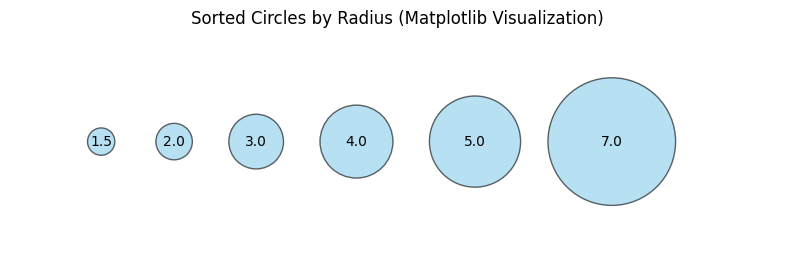

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle as PatchCircle
import math

# Reuse the Circle class
class Circle:
    def __init__(self, *, radius=None, diameter=None):
        if radius is not None:
            self._radius = radius
        elif diameter is not None:
            self._radius = diameter / 2
        else:
            raise ValueError("You must provide either a radius or a diameter.")

    @property
    def radius(self):
        return self._radius

    @property
    def diameter(self):
        return self._radius * 2

    def area(self):
        return math.pi * self._radius ** 2

    def __str__(self):
        return f"Circle with radius {self.radius:.2f} and diameter {self.diameter:.2f}"

    def __add__(self, other):
        if not isinstance(other, Circle):
            return NotImplemented
        return Circle(radius=self.radius + other.radius)

    def __eq__(self, other):
        return isinstance(other, Circle) and self.radius == other.radius

    def __lt__(self, other):
        return isinstance(other, Circle) and self.radius < other.radius

    def __repr__(self):
        return f"Circle(radius={self.radius:.2f})"

# Create and sort circles
circles = [
    Circle(radius=3),
    Circle(diameter=8),
    Circle(radius=5),
    Circle(radius=1.5),
    Circle(radius=7),
    Circle(diameter=4),
]

sorted_circles = sorted(circles)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_aspect('equal')
ax.set_title("Sorted Circles by Radius (Matplotlib Visualization)")
ax.axis('off')  # Hide axis

x_pos = 0
spacing = 5  # Horizontal space between circles

for i, circle in enumerate(sorted_circles):
    radius = circle.radius
    patch = PatchCircle((x_pos, 0), radius=radius, edgecolor='black', facecolor='skyblue', alpha=0.6)
    ax.add_patch(patch)

    # Label each circle with its radius
    ax.text(x_pos, 0, f"{radius:.1f}", ha='center', va='center', fontsize=10, color='black')

    x_pos += radius * 2 + spacing

# Set limits to fit all circles
ax.set_xlim(-10, x_pos)
ax.set_ylim(-max(c.radius for c in sorted_circles) - 5, max(c.radius for c in sorted_circles) + 5)

plt.show()
